Notebook para exploração dos dados, treinamento e teste do modelo

# Carregando os dados

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregar o conjunto de dados
dados = pd.read_csv("dataset/brasil_estado_cidade.csv", encoding="latin1")

# Exibir as primeiras linhas do dataset
print(dados.head())

   Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2  price_brl    city  
0     72.0  414222.98  Recife  
1    136.0  848408.53  Recife  
2     75.0  299438.28  Recife  
3    187.0  848408.53  Recife  
4     80.0  464129.36  Recife  


# Tratamento dos Dados

In [3]:
# Calculando o valor do metro quadrado do imóvel
dados['price_m2'] = dados['price_brl'] / dados['area_m2']

# Exibir as primeiras linhas para verificar
print(dados.head())

   Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2  price_brl    city     price_m2  
0     72.0  414222.98  Recife  5753.096944  
1    136.0  848408.53  Recife  6238.298015  
2     75.0  299438.28  Recife  3992.510400  
3    187.0  848408.53  Recife  4536.944011  
4     80.0  464129.36  Recife  5801.617000  


# Explorando

In [4]:
# Informações gerais
print("Informações gerais do dataset:")
print(dados.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(dados.describe())

# Valores ausentes
print("\nValores ausentes:")
print(dados.isnull().sum())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12833 non-null  int64  
 1   property_type  12833 non-null  object 
 2   state          12833 non-null  object 
 3   region         12833 non-null  object 
 4   lat            12833 non-null  float64
 5   lon            12833 non-null  float64
 6   area_m2        11293 non-null  float64
 7   price_brl      12833 non-null  float64
 8   city           12809 non-null  object 
 9   price_m2       11293 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1002.7+ KB
None

Estatísticas descritivas:
         Unnamed: 0           lat           lon       area_m2     price_brl  \
count  12833.000000  12833.000000  12833.000000  11293.000000  1.283300e+04   
mean    6417.000000    -24.689864    -46.753962    113.306916  6.652324e+05  


Análise de colunas categóricas:

Coluna: property_type
property_type
apartment    10057
house         2776
Name: count, dtype: int64


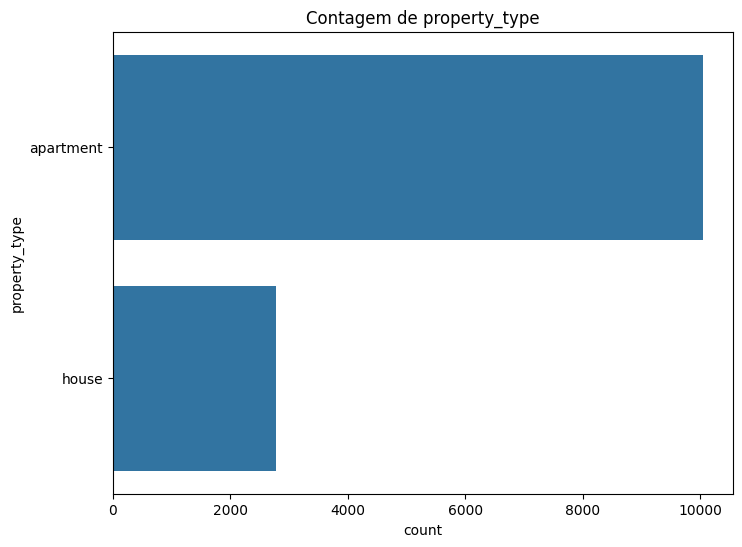


Coluna: state
state
Rio de Janeiro         3000
Rio Grande do Sul      3000
SÂo Paulo             3000
Santa Catarina         3000
Pernambuco              372
Rio Grande do Norte     342
Sergipe                  83
PiauÂ                   29
RondÂnia                 5
Tocantins                 2
Name: count, dtype: int64


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


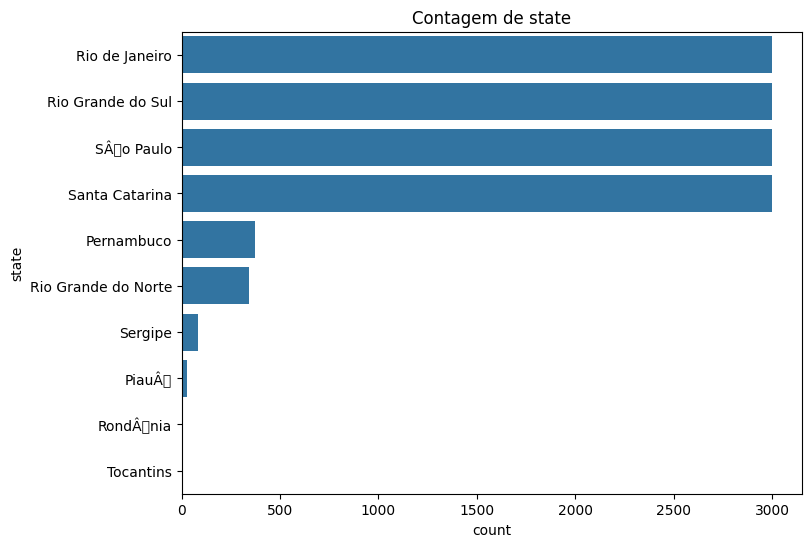


Coluna: region
region
South        6000
Southeast    6000
Northeast     826
North           7
Name: count, dtype: int64


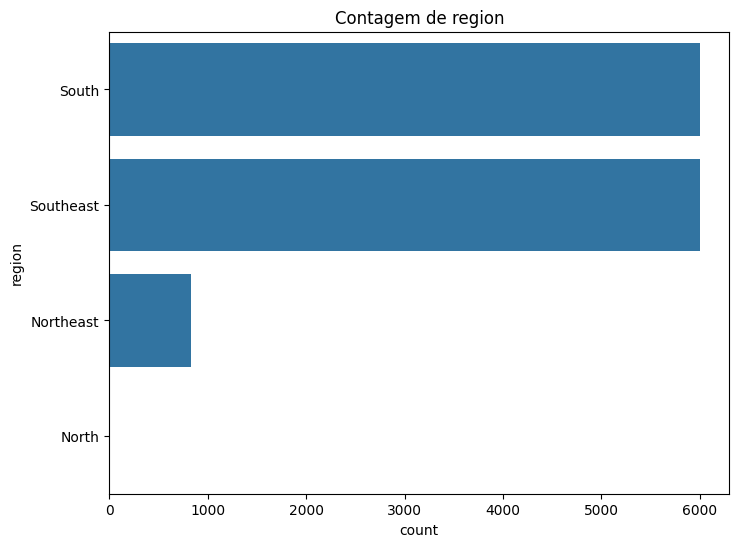


Coluna: city
city
Porto Alegre            2286
Rio de Janeiro          2278
SÃ£o Paulo              1811
BalneÃ¡rio CamboriÃº    1361
FlorianÃ³polis           531
                        ... 
Atibaia                    1
Embu das Artes             1
AraÃ§oiaba da Serra        1
GuaraÃ­                    1
Palmas                     1
Name: count, Length: 188, dtype: int64


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


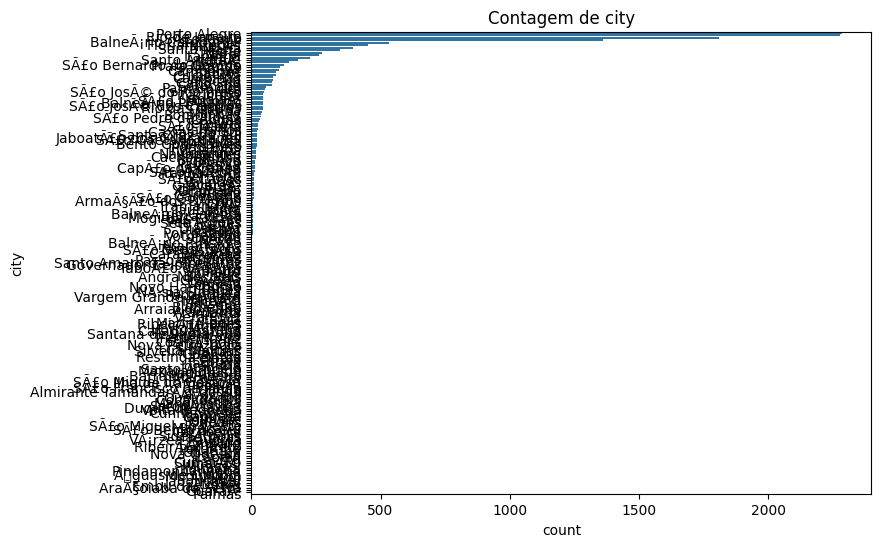

In [5]:
# Análise de colunas categóricas
colunas_categoricas = ['property_type', 'state', 'region', 'city']


print("\nAnálise de colunas categóricas:")
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(dados[coluna].value_counts())

    # Gráfico de barras para visualização
    plt.figure(figsize=(8, 6))
    sns.countplot(y=dados[coluna], order=dados[coluna].value_counts().index)
    plt.title(f"Contagem de {coluna}")
    plt.show()


Análise de colunas numéricas:

Coluna: area_m2


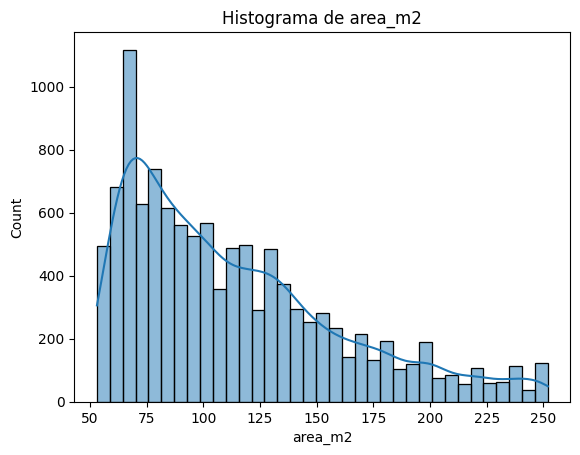

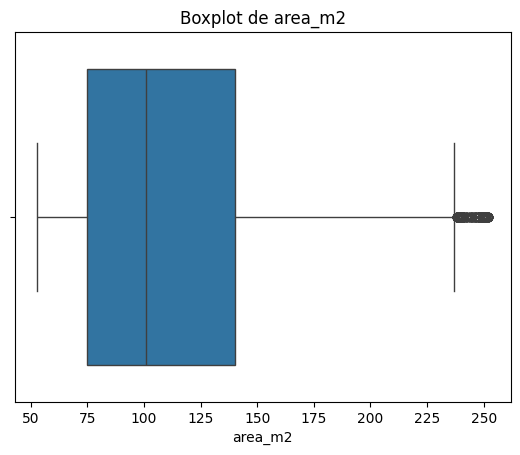


Coluna: price_brl


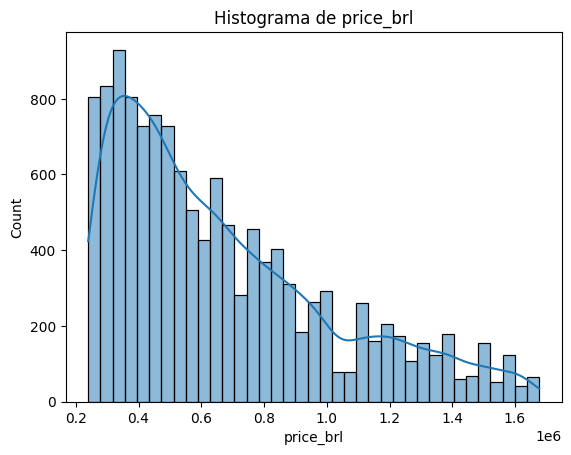

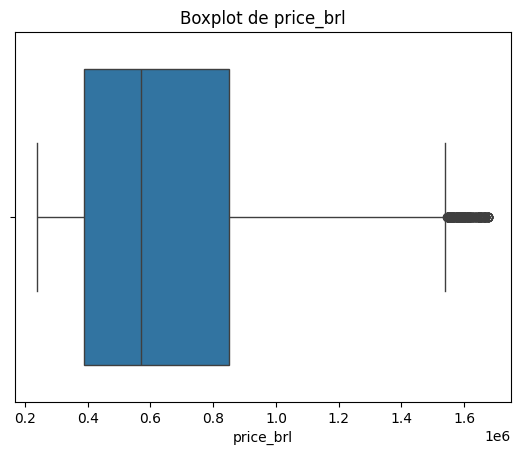


Coluna: price_m2


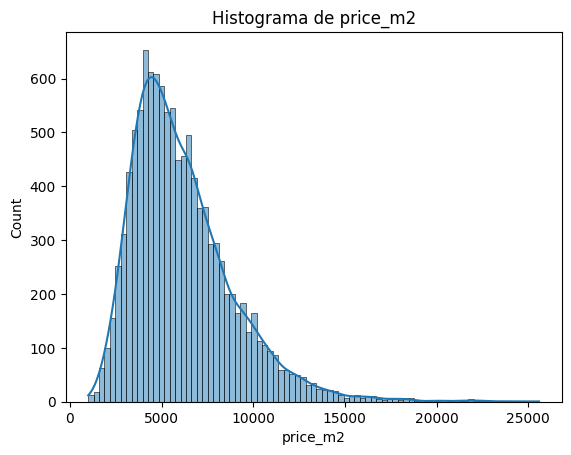

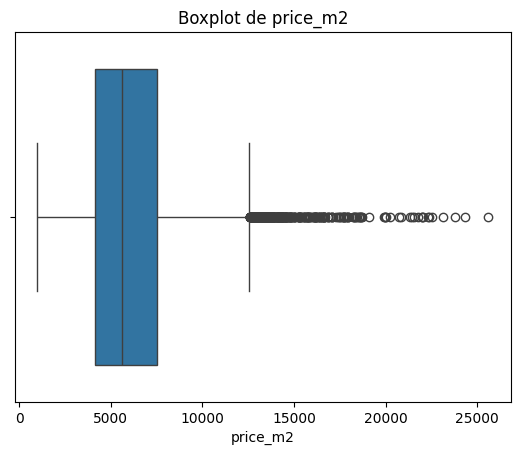

In [6]:

# Análise de colunas numéricas
colunas_numericas = ['area_m2', 'price_brl', 'price_m2']

print("\nAnálise de colunas numéricas:")

for coluna in colunas_numericas:
    print(f"\nColuna: {coluna}")

    # Histograma
    plt.figure()
    sns.histplot(dados[coluna], kde=True)
    plt.title(f"Histograma de {coluna}")
    plt.show()

    # Boxplot
    plt.figure()
    sns.boxplot(x=dados[coluna])
    plt.title(f"Boxplot de {coluna}")
    plt.show()
    


# Cruzando dados

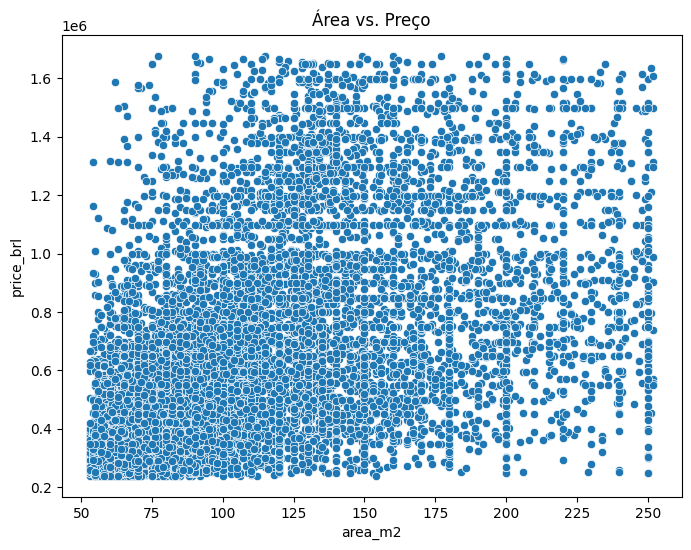

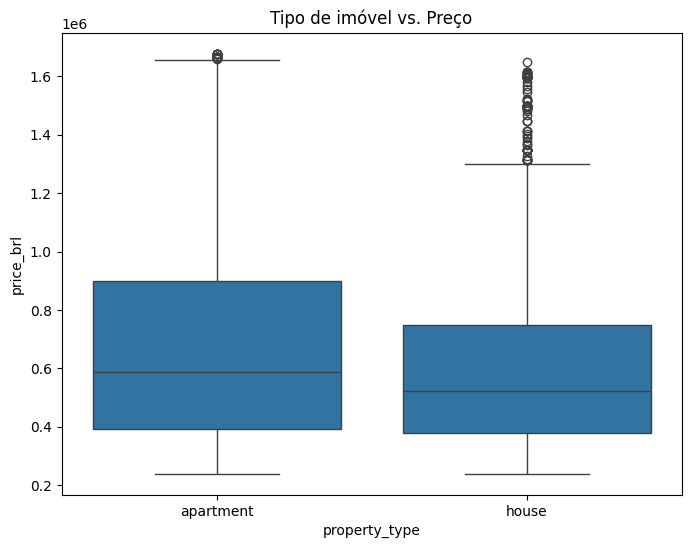

In [7]:
# Relação entre area_m2 e price_brl
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_m2', y='price_brl', data=dados)
plt.title("Área vs. Preço")
plt.show()

# Relação entre property_type e price_brl
plt.figure(figsize=(8, 6))
sns.boxplot(x='property_type', y='price_brl', data=dados)
plt.title("Tipo de imóvel vs. Preço")
plt.show()

/usr/local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


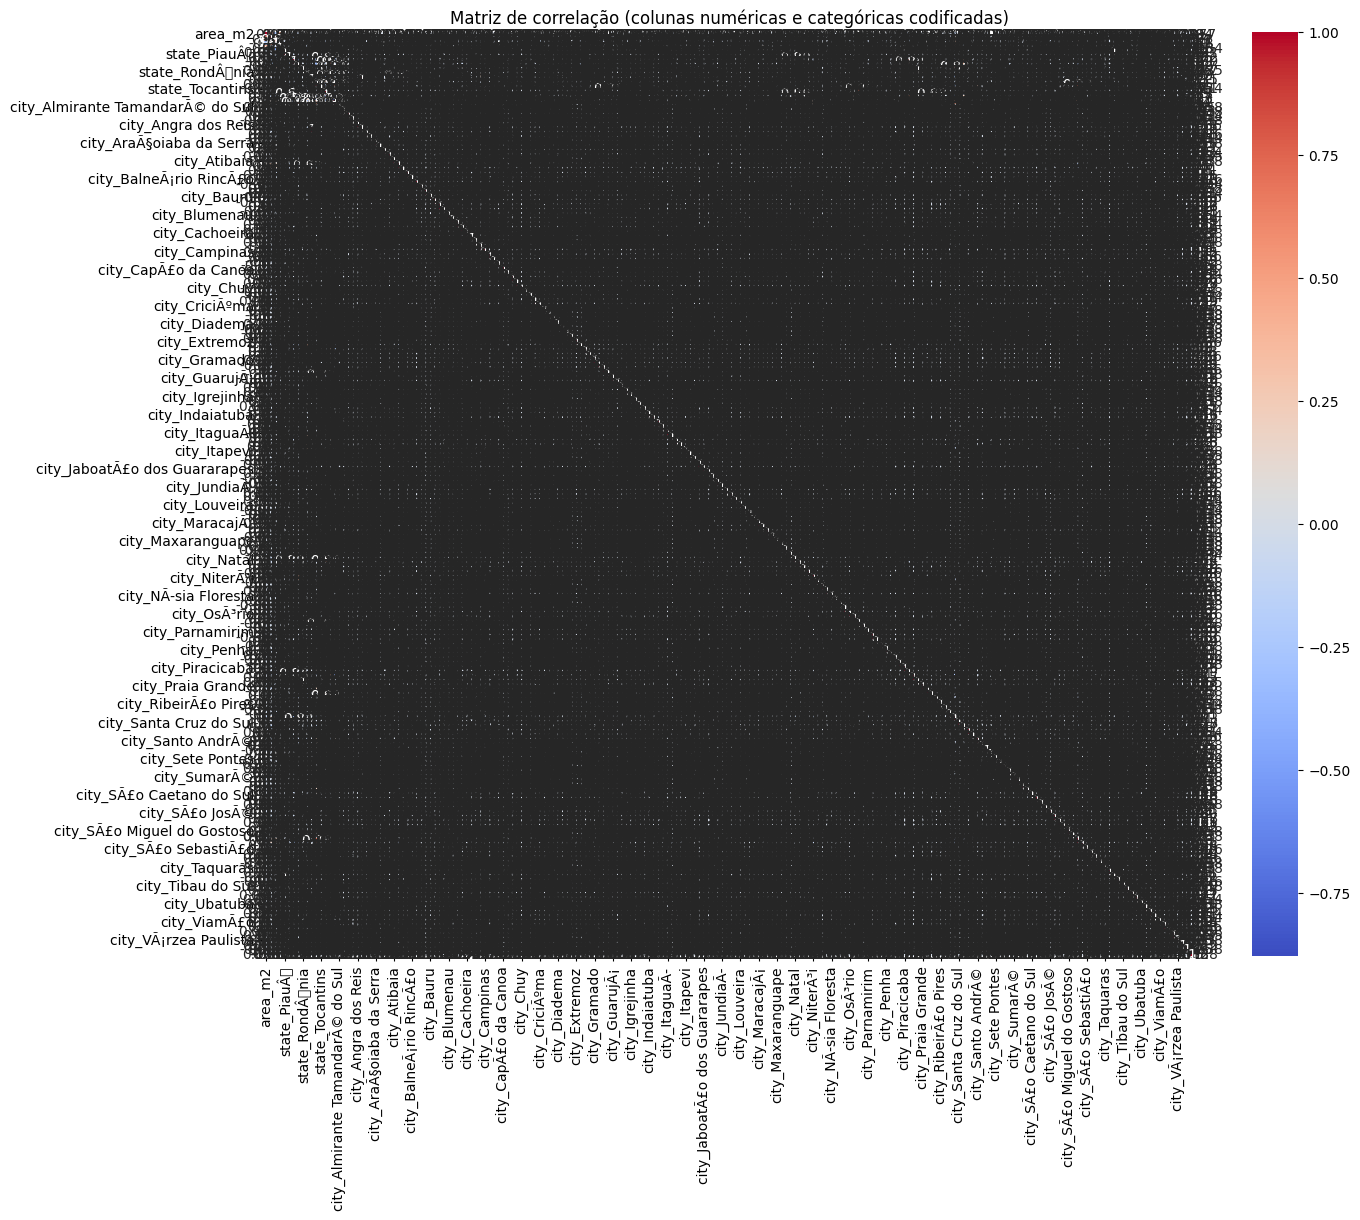

In [8]:
# One-Hot Encoding para colunas categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' para evitar multicolinearidade
encoded_categorias = encoder.fit_transform(dados[colunas_categoricas])
encoded_df = pd.DataFrame(encoded_categorias, columns=encoder.get_feature_names_out(colunas_categoricas))

# Concatenando colunas numéricas e categóricas codificadas
dados_tratados = pd.concat([dados[colunas_numericas], encoded_df], axis=1)

# Calculando e visualizando a matriz de correlação
plt.figure(figsize=(15, 12))
sns.heatmap(dados_tratados.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlação (colunas numéricas e categóricas codificadas)")
plt.show()

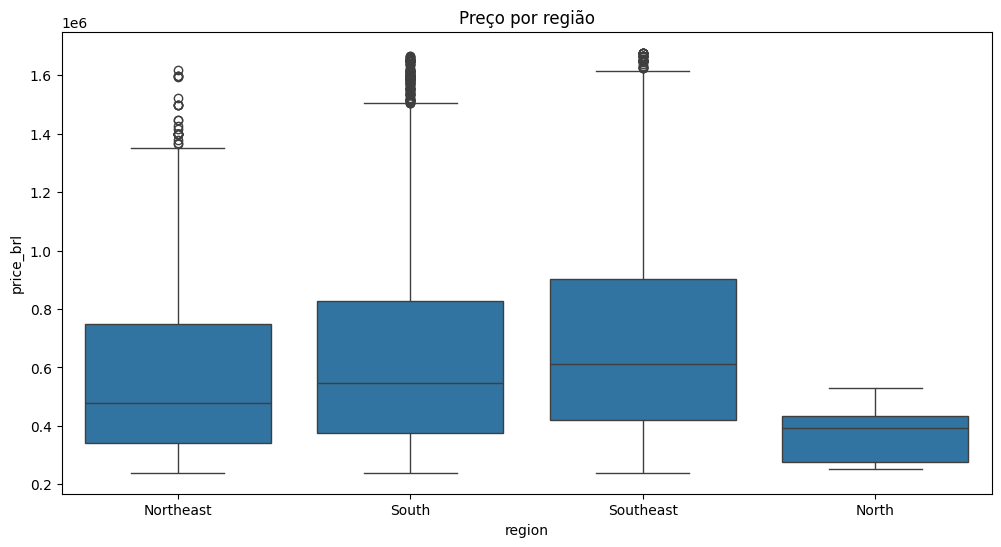

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


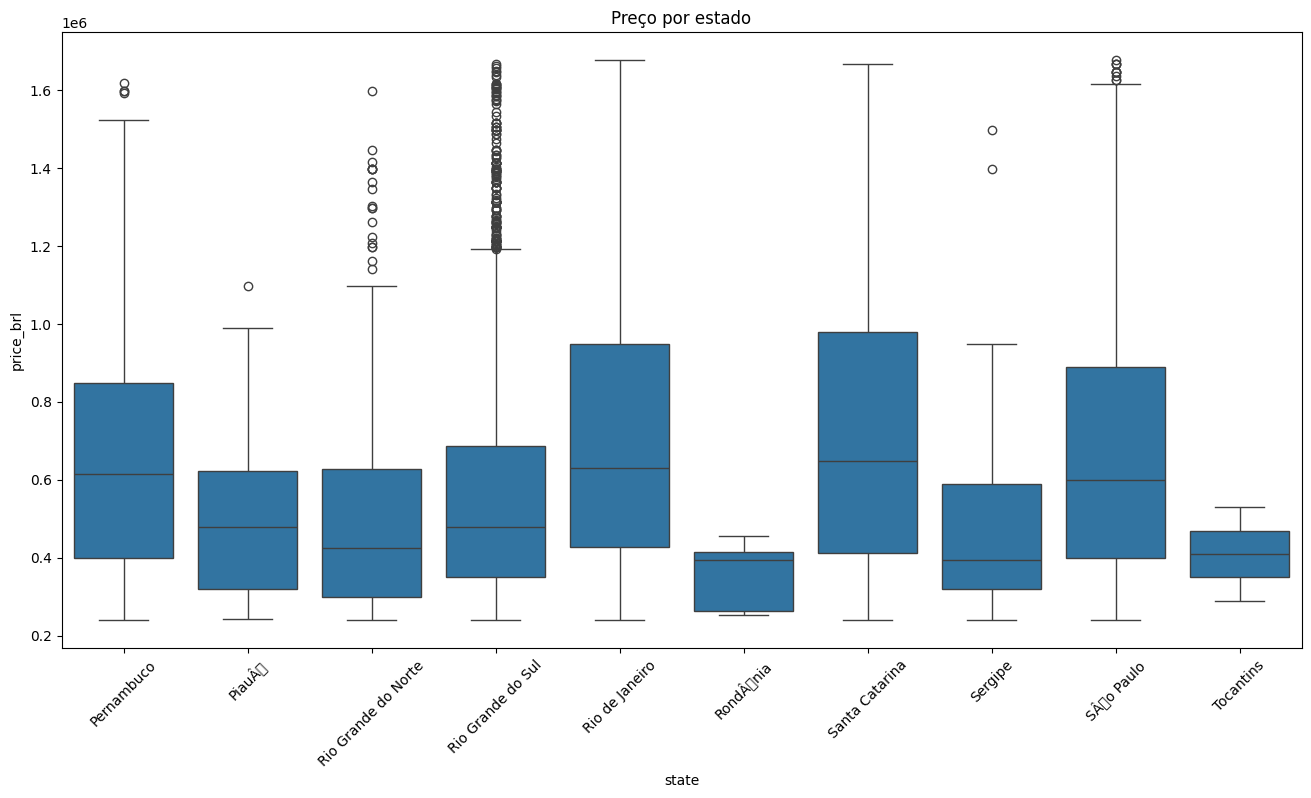

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


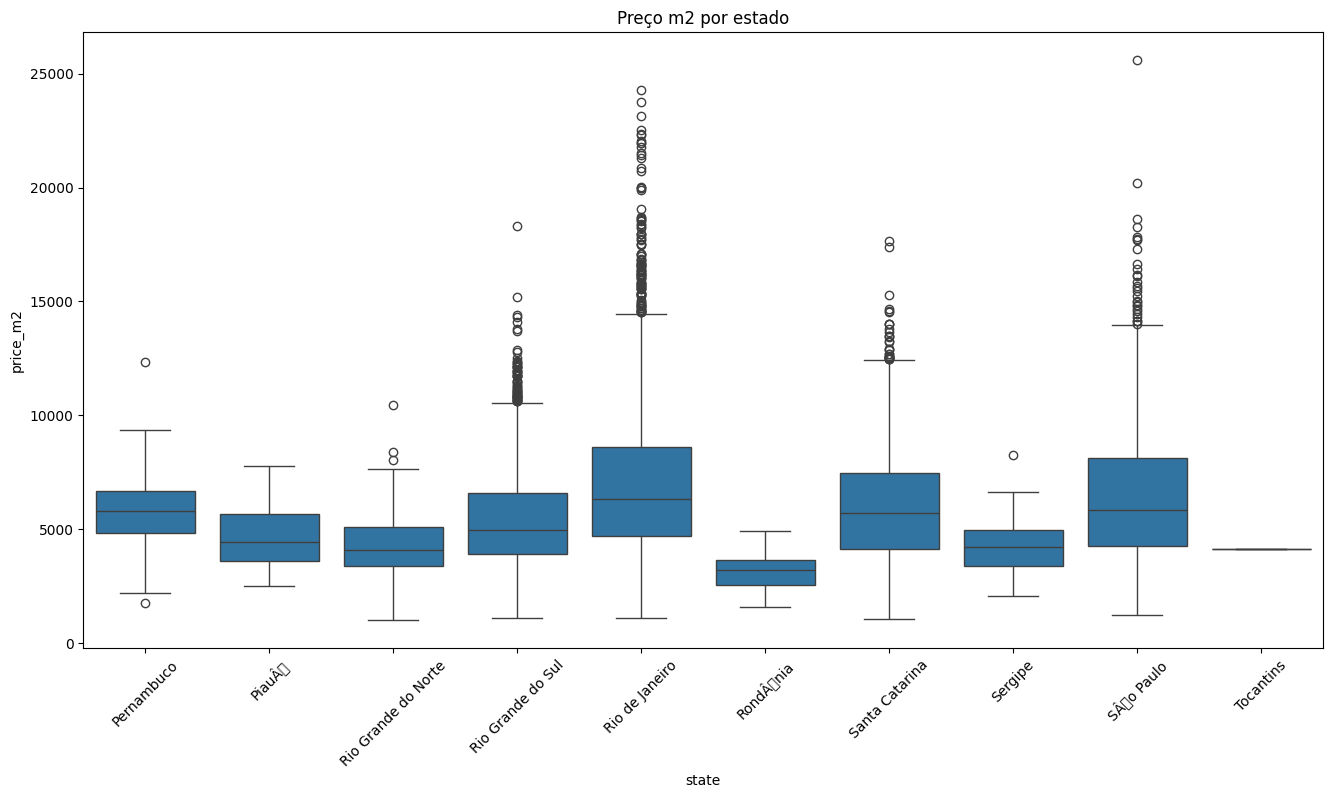

In [12]:
# Preço por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='price_brl', data=dados)
plt.title("Preço por região")
plt.show()

# Preço por estado
plt.figure(figsize=(16, 8))
sns.boxplot(x='state', y='price_brl', data=dados)
plt.title("Preço por estado")
plt.xticks(rotation=45)
plt.show()

# Metro 2 por região
plt.figure(figsize=(16, 8))
sns.boxplot(x='state', y='price_m2', data=dados)
plt.title("Preço m2 por estado")
plt.xticks(rotation=45)
plt.show()



/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


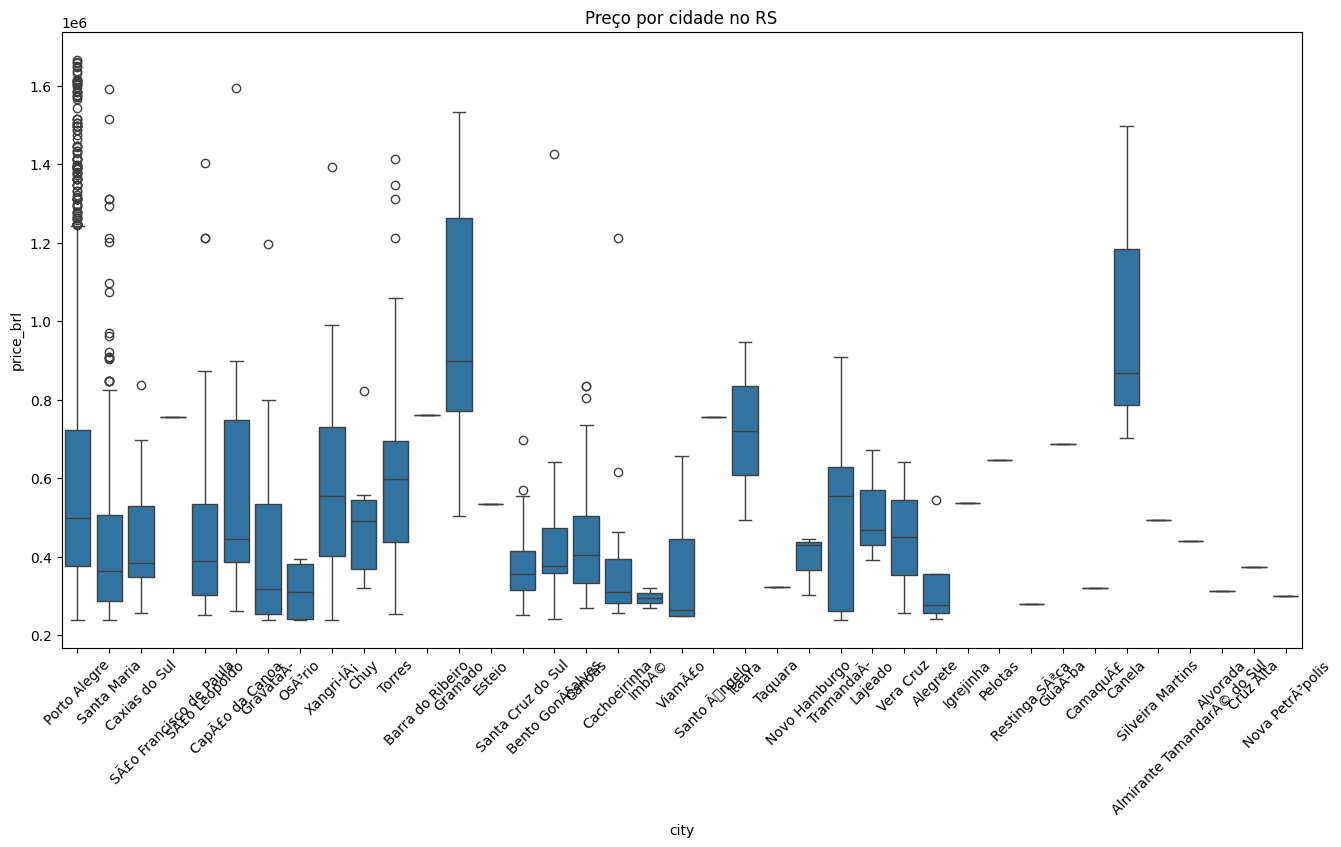

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


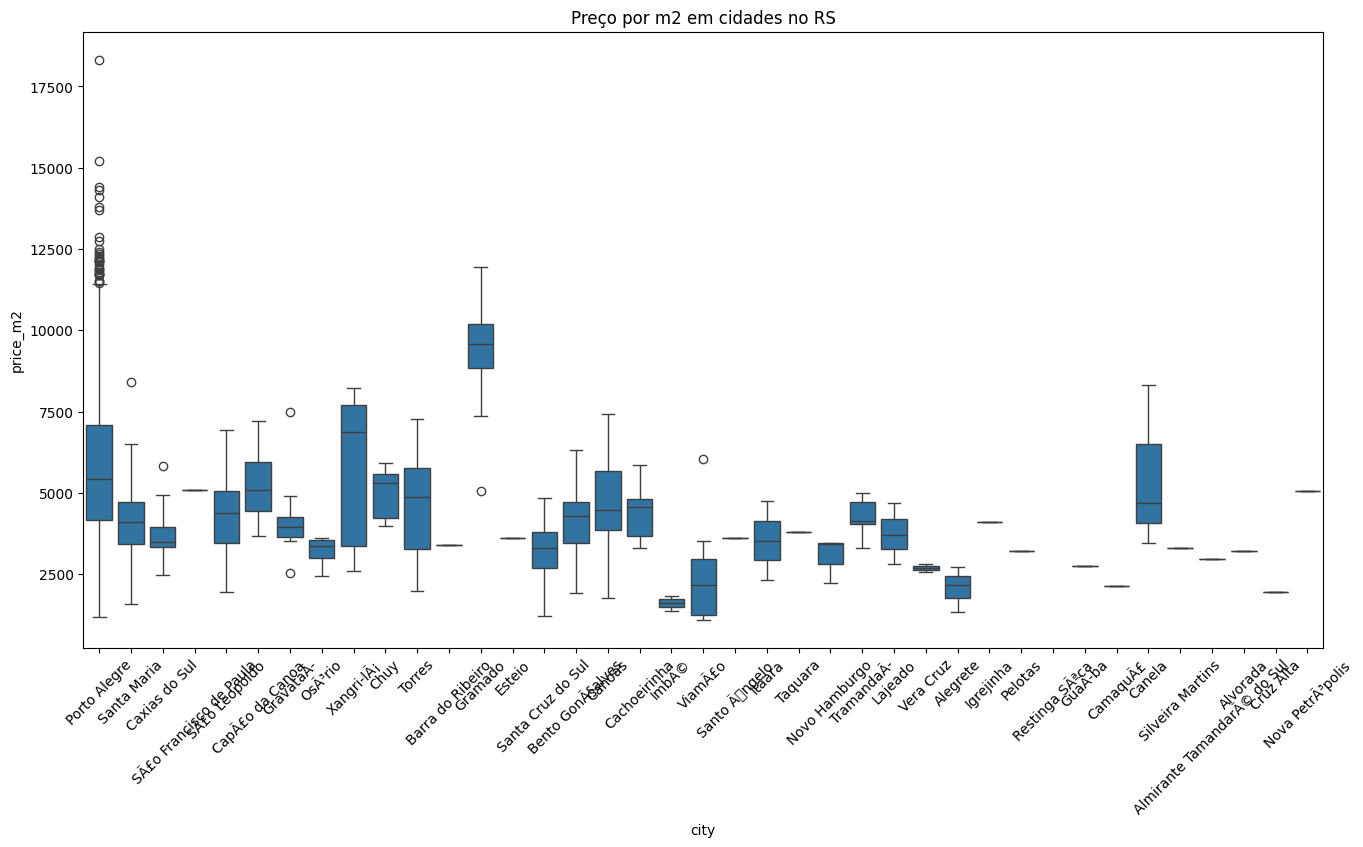

In [13]:
dados_rs = dados[dados['state'] == "Rio Grande do Sul"]

# Preço no RS
plt.figure(figsize=(16, 8))
sns.boxplot(x='city', y='price_brl', data=dados_rs)
plt.title("Preço por cidade no RS")
plt.xticks(rotation=45)
plt.show()

# Metro 2 no RS
plt.figure(figsize=(16, 8))
sns.boxplot(x='city', y='price_m2', data=dados_rs)
plt.title("Preço por m2 em cidades no RS")
plt.xticks(rotation=45)
plt.show()

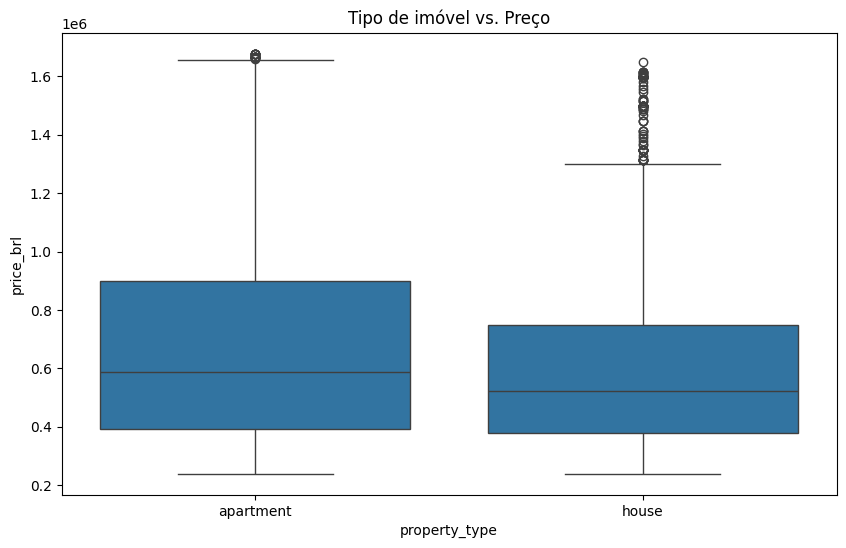

In [14]:
# Tipo de imóvel vs. preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price_brl', data=dados)
plt.title("Tipo de imóvel vs. Preço")
plt.show()

# Distribuição Geográfica

In [15]:
import geopandas
from shapely.geometry import Point

# Criando um GeoDataFrame a partir das coordenadas
geometry = [Point(xy) for xy in zip(dados['lon'], dados['lat'])]
geo_dados = geopandas.GeoDataFrame(dados, geometry=geometry)


# Carregando o mapa do Brasil
brasil = geopandas.read_file("dataset/mapas/ne_110m_admin_0_countries.shp")
brasil = brasil[brasil.ADMIN == 'Brazil']


# Plotando o mapa e os pontos dos imóveis
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='lightgray')
geo_dados.plot(ax=ax, markersize=5, color='red')
plt.title("Distribuição geográfica dos imóveis no Brasil")
plt.show()

ModuleNotFoundError: No module named 'geopandas'

Preparação dos dados para treinamento

Treinamento de modelos

- **Regressão Linear**: Simples e interpretável, ideal para estabelecer uma linha de base.
- **Árvores de Decisão**: Capturam relações não-lineares entre as variáveis.
- **Random Forest**: Combinação de múltiplas árvores para melhorar a robustez e reduzir overfitting.
- **Gradient Boosting (ex.: XGBoost, LightGBM)**



teste dos modelos